## 모델 불러오기

In [1]:
## 라이브러리 설치
##pip install trimesh

In [2]:
import trimesh

In [3]:
model = trimesh.load('./obj/model.stl')

In [4]:
model.show()

In [5]:
## 모델 내 중복된 꼭지점 합치기
## trimesh에서는 필요없음
# model.merge_vertices()

In [6]:
## 변수에 저장
vertices = model.vertices

## 샘플 추출

https://trimesh.org/trimesh.sample.html

## 시각화

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

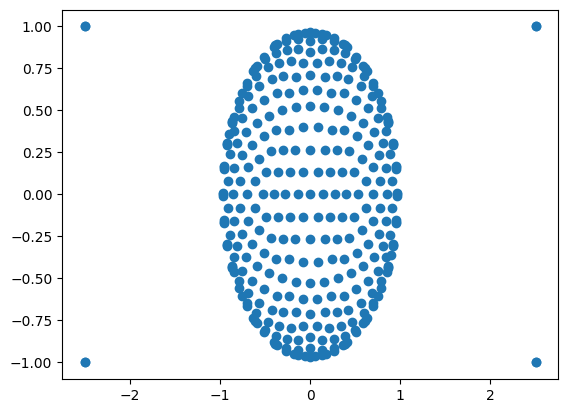

In [9]:
plt.scatter(vertices[:,0], vertices[:,1])

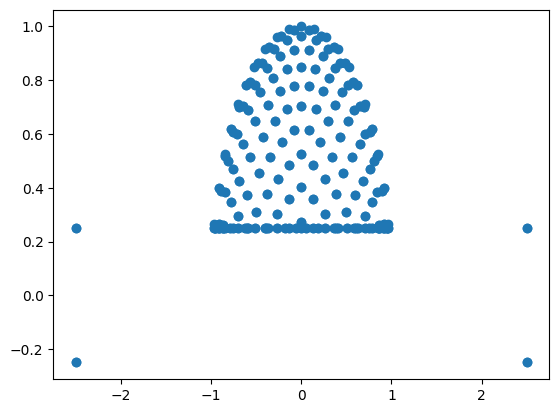

In [10]:
plt.scatter(vertices[:,0], vertices[:,2])

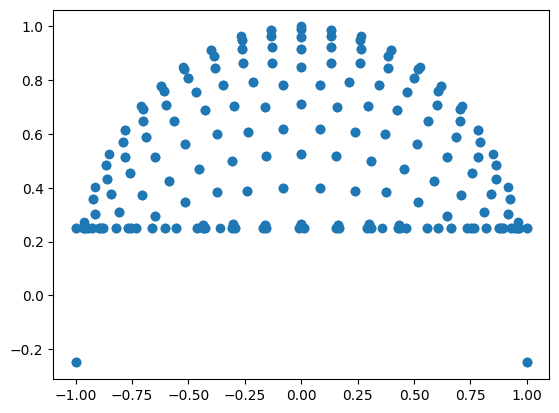

In [11]:
plt.scatter(vertices[:,1], vertices[:,2])

In [19]:
## 꼭지점 scatter
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.view_init(elev=0, azim=90)
# ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2])

In [17]:
##sample_surface_even()은 샘플들이 서로 가까이 붙지않도록 배치
samples = trimesh.sample.sample_surface_even(model, 100)
points = samples[0]
points

TrackedArray([[ 1.11765153e+00, -1.00000000e+00,  1.22160924e-01],
              [ 1.47552255e+00,  1.65284397e-03, -2.50000000e-01],
              [ 1.40107132e+00,  1.00000000e+00,  2.92730146e-02],
              [-1.59424383e+00, -8.02822463e-01, -2.50000000e-01],
              [-1.37325900e+00,  2.44945654e-01,  2.50000000e-01],
              [ 2.41705442e+00, -2.72737521e-01, -2.50000000e-01],
              [-3.86425803e-01, -3.87474351e-01,  8.35638143e-01],
              [-5.59077953e-01, -2.73174637e-01, -2.50000000e-01],
              [-2.14554417e+00, -1.24847960e-01,  2.50000000e-01],
              [ 2.32333266e-02,  5.05826729e-01, -2.50000000e-01],
              [-7.69325849e-01, -4.05147052e-01,  4.87463974e-01],
              [ 3.05976735e-01,  1.40509255e-01,  9.38605045e-01],
              [-1.37534086e+00, -3.78337154e-01,  2.50000000e-01],
              [-9.27150527e-01, -2.19760989e-01,  2.91936215e-01],
              [-2.44756136e+00, -2.23286962e-01, -2.50000000e-

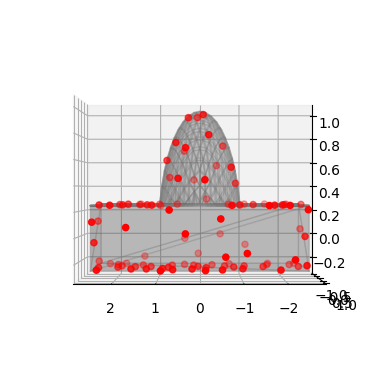

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=model.faces, color='gray', alpha=0.2, edgecolor='gray')
ax.view_init(elev=0, azim=90)
ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='red')

plt.show()

## 확률 밀도 함수 추정
### scipy 내 parzen method는 1차원 윈도우만 생성
https://sebastianraschka.com/Articles/2014_kernel_density_est.html

In [14]:
from scipy import signal
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt